In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


<h1>Lessons Learned Report: </h1>
<h3>Alberto Chaves </h3>
Packages used: 

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
**Pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
**Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the
response variable. This study reviewed the literature and used the following 23 variables
as explanatory variables:
LIMIT_BAL: Amount of the given credit (dollar): it includes both the individual consumer
credit and his/her family (supplementary) credit.
SEX: Gender (1 = male; 2 = female).
EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
MARRIAGE: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
AGE: Age (year).
(month)PAY: History of past payment. We tracked the past monthly payment records (from
April to September, 2005)
The measurement scale for the repayment status is:
-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
months; 9 = payment delay for nine months and above.
(month)Bill: Amount of bill statement (NT dollar). X12 = amount of bill statement in
September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of
bill statement in April, 2005.
(month)PAY: Amount of previous payment (NT dollar). X18 = amount paid in September,
2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
Y: client's behavior; Y=0 then not default, Y=1 then default"

In [3]:
credit = pd.read_csv('default_credit_card_clients.csv', header =0)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,...,JuneBill,MayBill,AprilBill,SeptemberPayment,AugustPayment,JulyPayment,JunePayment,MayPayment,AprilPayment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'SeptemberPay', 'AugustPay', 'JulyPay', 'JunePay', 'MayPay', 'AprilPay',
       'SeptemberBill', 'AugustBill', 'JulyBill', 'JuneBill', 'MayBill',
       'AprilBill', 'SeptemberPayment', 'AugustPayment', 'JulyPayment',
       'JunePayment', 'MayPayment', 'AprilPayment',
       'default payment next month'],
      dtype='object')

In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,...,JuneBill,MayBill,AprilBill,SeptemberPayment,AugustPayment,JulyPayment,JunePayment,MayPayment,AprilPayment,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null int64
AugustPay                     30000 non-null int64
JulyPay                       30000 non-null int64
JunePay                       30000 non-null int64
MayPay                        30000 non-null int64
AprilPay                      30000 non-null int64
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null int64
AprilBill               

In [7]:
credit = credit.astype({"ID":'category', "SEX":'category', "EDUCATION":'category', "MARRIAGE":'category', "SeptemberPay":'category', "AugustPay":'category', "JulyPay":'category', "JunePay":'category', "MayPay":'category', "AprilPay":'category', "default payment next month":'category'})


I Changed the  following column type to category:

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null category
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null category
AugustPay                     30000 non-null category
JulyPay                       30000 non-null category
JunePay                       30000 non-null category
MayPay                        30000 non-null category
AprilPay                      30000 non-null category
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null 

Any Null values? to find null values use the following code: 

In [10]:
credit.isnull().values.any()

False

I discretized age to 5 age range categories: 

In [ ]:
credit['AGE'] = pd.qcut(credit['AGE'], q=5)

In [15]:
credit['AGE'].describe()

count            30000
unique               5
top       (31.0, 37.0]
freq              6728
Name: AGE, dtype: object

Some could consider putting all the "other" categories in education together. But watching their values (0,4,5,6) my guess is that they represent 0: no education 4: masters, 5: phD, 6: post-doctorate. So I wont pair them together. This could be clarified later by our client. 

<h2>Analysis</h2>

In [18]:
credit = credit.rename(columns={"default payment next month": "default"})

In [19]:
credit.default = credit.default.replace({0: 'NO',
                                         1: 'YES'})

I decided to change the name from: "defualt payment next month" to just "default".
I also changed the values for that same column to be YES or NO, not 1 and 0, that is confusing.


In [22]:
credit.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: default, dtype: object

In [16]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [17]:
credit.SEX = credit.SEX.replace({1: "Male",
                                2: "Female"})

I will change the values to Female and Male, because that is also confusing.

In [23]:
credit['SEX']

0        Female
1        Female
2        Female
3        Female
4          Male
          ...  
29995      Male
29996      Male
29997      Male
29998      Male
29999      Male
Name: SEX, Length: 30000, dtype: object

In [27]:
credit.groupby('SEX')['SEX'].count()

SEX
Female    18112
Male      11888
Name: SEX, dtype: int64

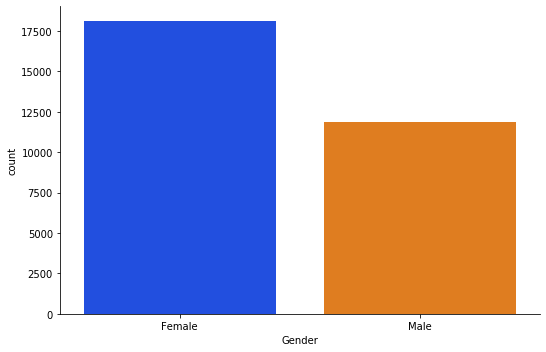

In [35]:
# Instead of a group by, use seaborn to see the male and female count. 
sns.set_palette('bright')
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Gender')

I found the seaborn website and am using a bright color palette. 
https://seaborn.pydata.org/

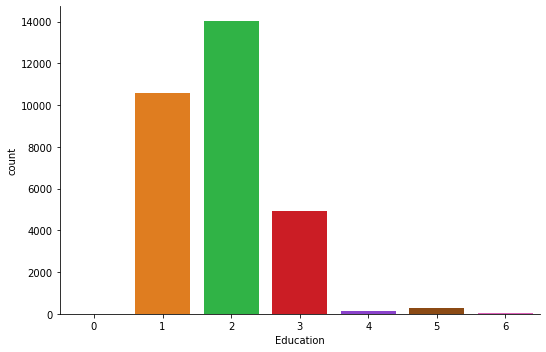

In [52]:
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education')

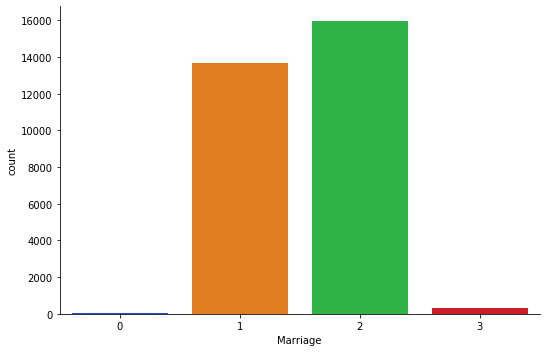

In [36]:
fg = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Marriage')

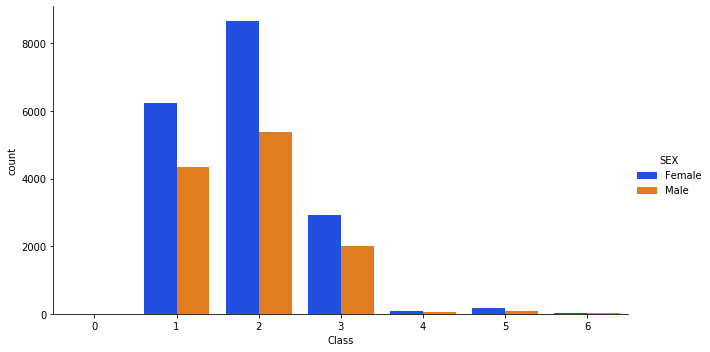

In [38]:
g = sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Distribution of Gender and Education')

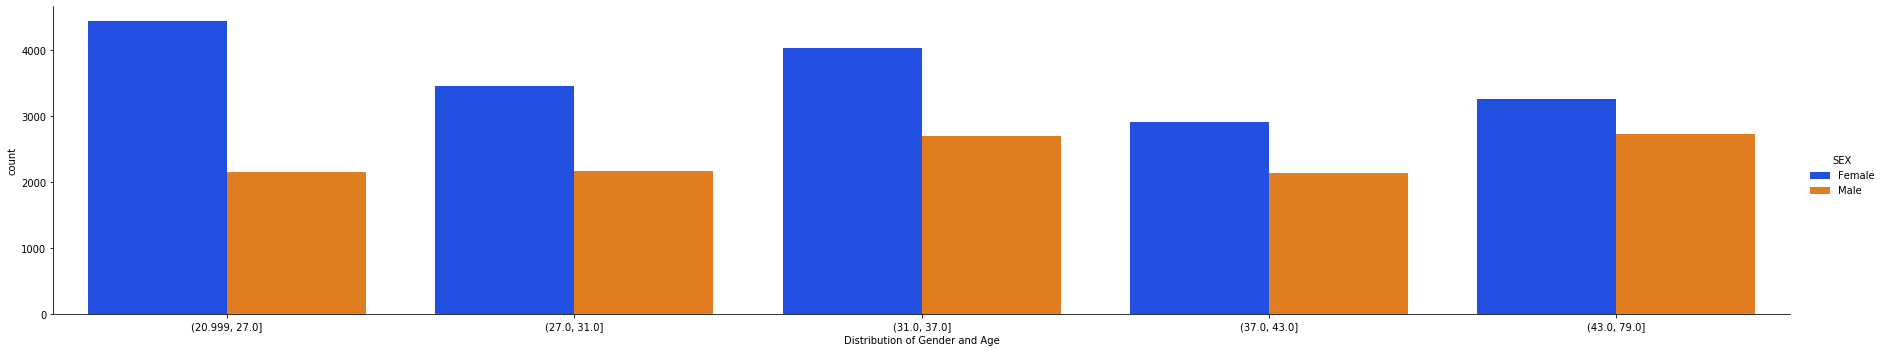

In [66]:
g = sns.factorplot('AGE', data=credit, hue='SEX', kind='count', aspect=5)
g.set_xlabels('Distribution of Gender and Age')

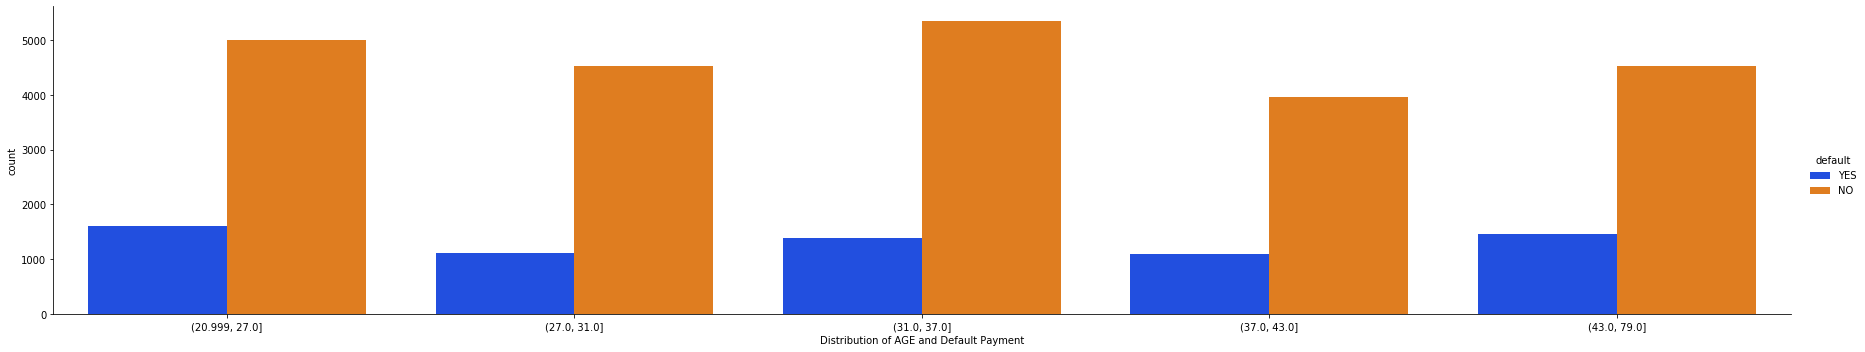

In [67]:
g = sns.factorplot('AGE', data=credit, hue='default', kind='count', aspect=5)
g.set_xlabels('Distribution of AGE and Default Payment')

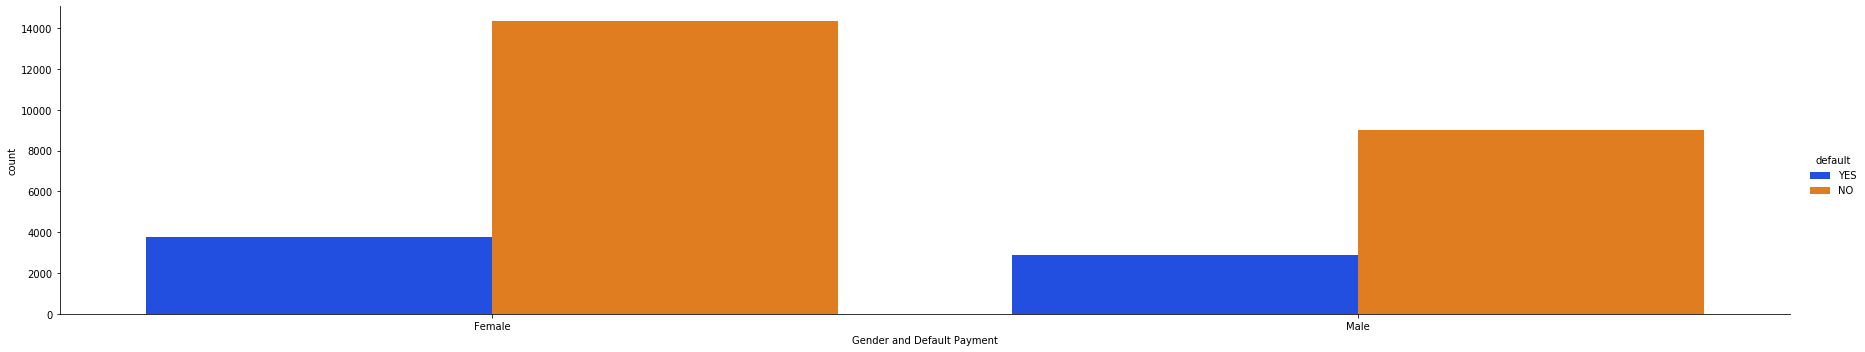

In [54]:
g = sns.factorplot('SEX', data=credit, hue='default', kind='count', aspect=5)
g.set_xlabels('Gender and Default Payment')

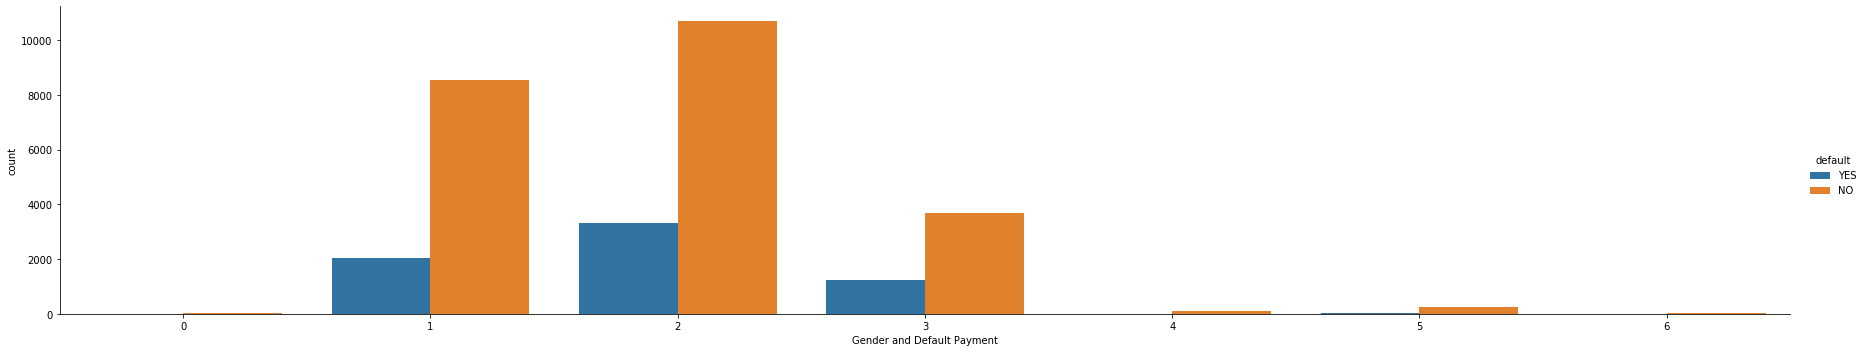

In [25]:
g = sns.catplot('EDUCATION', data=credit, hue='default', kind='count', aspect=5)
g.set_xlabels('Gender and Default Payment')

In [41]:
corrMat = credit.corr()
print(corrMat)

                  LIMIT_BAL       AGE  SeptemberBill  AugustBill  JulyBill  \
LIMIT_BAL          1.000000  0.144713       0.285430    0.278314  0.283236   
AGE                0.144713  1.000000       0.056239    0.054283  0.053710   
SeptemberBill      0.285430  0.056239       1.000000    0.951484  0.892279   
AugustBill         0.278314  0.054283       0.951484    1.000000  0.928326   
JulyBill           0.283236  0.053710       0.892279    0.928326  1.000000   
JuneBill           0.293988  0.051353       0.860272    0.892482  0.923969   
MayBill            0.295562  0.049345       0.829779    0.859778  0.883910   
AprilBill          0.290389  0.047613       0.802650    0.831594  0.853320   
SeptemberPayment   0.195236  0.026147       0.140277    0.280365  0.244335   
AugustPayment      0.178408  0.021785       0.099355    0.100851  0.316936   
JulyPayment        0.210167  0.029247       0.156887    0.150718  0.130011   
JunePayment        0.203242  0.021379       0.158303    0.147398

In [42]:
covMat = credit.cov()
print(covMat)

                     LIMIT_BAL            AGE  SeptemberBill    AugustBill  \
LIMIT_BAL         1.683446e+10  173076.722569   2.727020e+09  2.570130e+09   
AGE               1.730767e+05      84.969755   3.817293e+04  3.561366e+04   
SeptemberBill     2.727020e+09   38172.933546   5.422240e+09  4.986670e+09   
AugustBill        2.570130e+09   35613.657962   4.986670e+09  5.065705e+09   
JulyBill          2.548533e+09   34334.251320   4.556511e+09  4.582086e+09   
JuneBill          2.453926e+09   30453.108180   4.075286e+09  4.086508e+09   
MayBill           2.331481e+09   27654.067800   3.714795e+09  3.720401e+09   
AprilBill         2.243837e+09   26137.648547   3.519876e+09  3.524868e+09   
SeptemberPayment  4.195711e+08    3992.041735   1.710894e+08  3.305146e+08   
AugustPayment     5.333504e+08    4626.861549   1.685692e+08  1.653859e+08   
JulyPayment       4.801180e+08    4746.824393   2.034048e+08  1.888731e+08   
JunePayment       4.131202e+08    3087.324192   1.826164e+08  1.

Target leakage: cuando creamos un modelo usadno variables que no vamos a tener e el momento de la prediccion 

In the correlation Matrix, some columns are not there because they are categorical and not numeric. 

**Did you learn anything of potential business value from this analysis?**
Sure. Doing reports this way is very useful for business. Both RStudio and Python have plenty of libraries for different uses, but I believe Python is thebest way to go. More varied userbase. 
**What are the main lessons you've learned from this experience?**
Seaborn was very interesting to find. The Exploratory Analysis framework really open my perspective to the way to do things in a professional manner. 
**What recommendations would you give to the Data Science team regarding your findings?**
I would like to distribute age defferently, since there could be a trend there that I am not finding because of using qcut and evenly distributing them. 
There definitely seems to be a correlation between education and default. 